### TP 1 : Détection d'anomalie,  Binome : BOUDJEBBOUR Maya - AZIZI Anis

In [ ]:
import numpy as np
np.set_printoptions(threshold=10000, suppress = True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score,classification_report, confusion_matrix,roc_curve, auc, precision_recall_curve, average_precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## **Partie 1 :** sur la base de données Mouse :

In [ ]:
#Importation et analyse du jeu de données
data = pd.read_csv("mouse.txt", sep=" ", header=None, names=['x1', 'x2'])
print(data.head())

         x1        x2
0  0.456601  0.432806
1  0.611378  0.528625
2  0.450299  0.711606
3  0.639015  0.460744
4  0.628957  0.323470


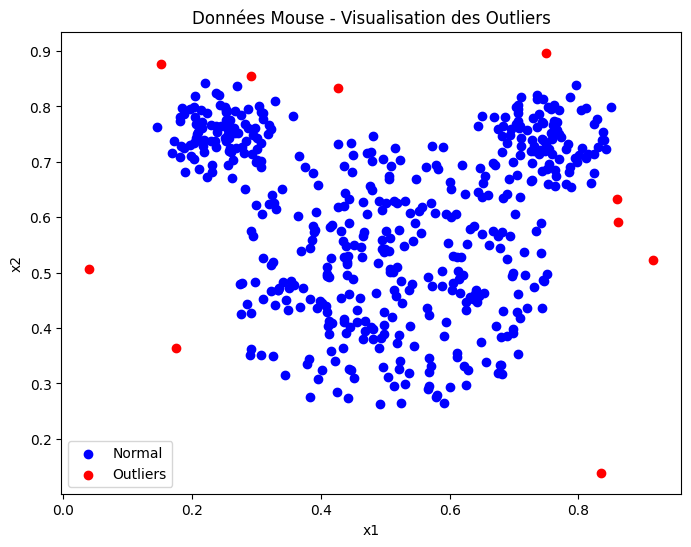

In [ ]:
# Représentation graphique des données avec les outliers en rouge et les autres en bleu
plt.figure(figsize=(8, 6))
plt.scatter(data['x1'][:490], data['x2'][:490], c='blue', label='Normal')
plt.scatter(data['x1'][490:], data['x2'][490:], c='red', label='Outliers')
plt.title('Données Mouse - Visualisation des Outliers')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


## Détection d'anomalie avec Isolation Forest

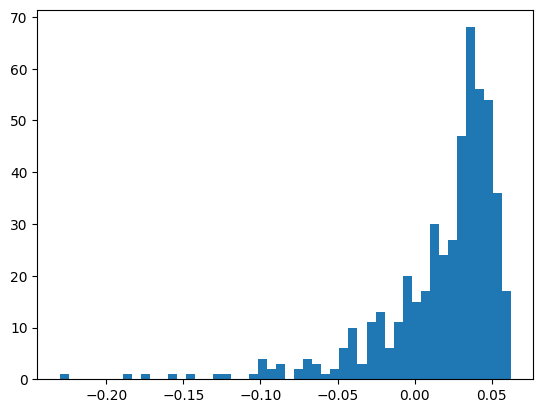

In [ ]:
clf = IsolationForest(n_estimators=1000, random_state=0)
clf.fit(data)
score = clf.decision_function(data)
plt.hist(score, bins=50)
plt.show()

On choisit de fixer le score à -0.10



In [ ]:
# On marque les points comme outliers si leur score est inférieur à -0.10
threshold = -0.10
data['outliers_adjusted'] = (score < threshold).astype(int)
print(data['outliers_adjusted'].value_counts())

outliers_adjusted
0    490
1     10
Name: count, dtype: int64


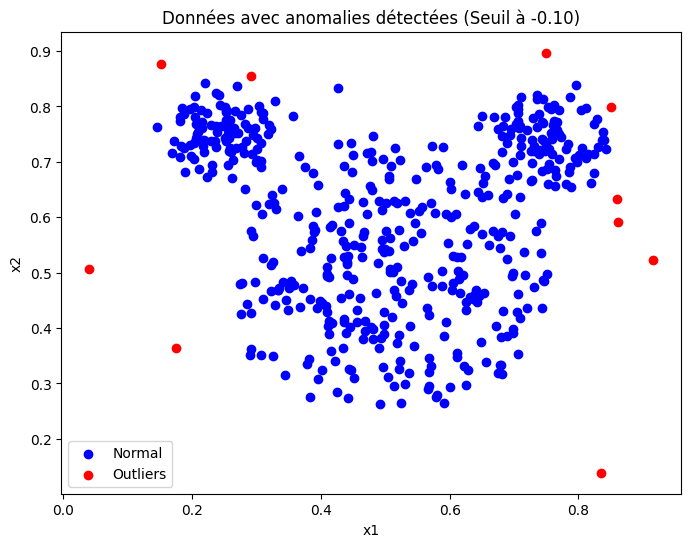

In [ ]:
# Représentation graphique avec les anomalies identifiées
plt.figure(figsize=(8, 6))
plt.scatter(data['x1'][data['outliers_adjusted'] == 0], data['x2'][data['outliers_adjusted'] == 0], c='blue', label='Normal')
plt.scatter(data['x1'][data['outliers_adjusted'] == 1], data['x2'][data['outliers_adjusted'] == 1], c='red', label='Outliers')
plt.title('Données avec anomalies détectées (Seuil à -0.10)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


## Application de Local Outlier Factor (LOF)

---



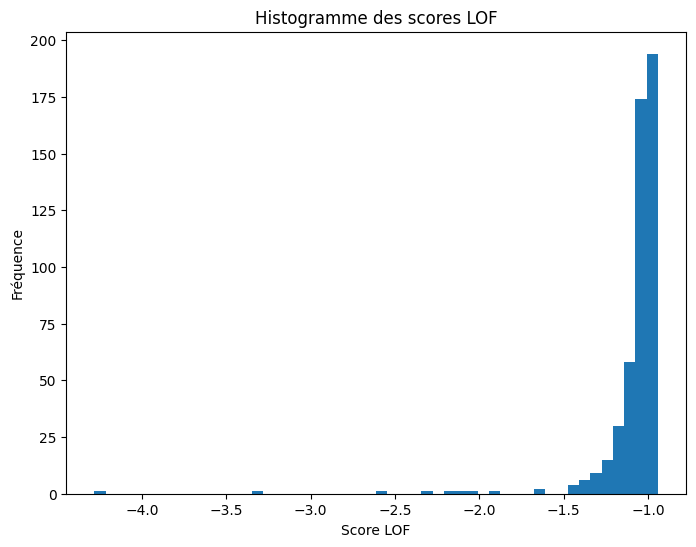

In [ ]:
#Application du LOF
lof = LocalOutlierFactor(n_neighbors=20, novelty=False)
lof.fit(data[['x1', 'x2']])

lof_scores = lof.negative_outlier_factor_ #Récupérer les scores

# Tracer l'histogramme des scores
plt.figure(figsize=(8, 6))
plt.hist(lof_scores, bins=50)
plt.title('Histogramme des scores LOF')
plt.xlabel('Score LOF')
plt.ylabel('Fréquence')
plt.show()



On choisit de fixer le score -1.5

In [ ]:
threshold = -1.5
data['outliers'] = (lof_scores < threshold).astype(int)
print(data['outliers'].value_counts())

outliers
0    490
1     10
Name: count, dtype: int64


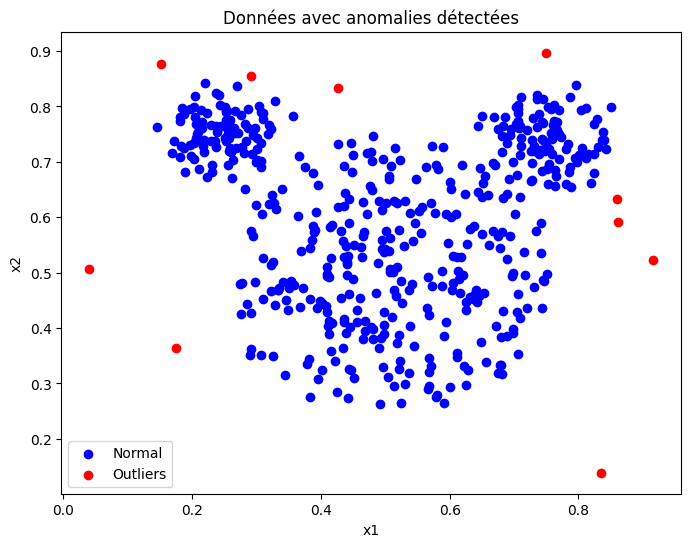

In [ ]:
# Visualisation des anomalies avec des labels explicites
plt.figure(figsize=(8, 6))
plt.scatter(data['x1'][data['outliers'] == 0], data['x2'][data['outliers'] == 0], c='blue', label='Normal')
plt.scatter(data['x1'][data['outliers'] == 1], data['x2'][data['outliers'] == 1], c='red', label='Outliers')
plt.title('Données avec anomalies détectées')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


### **L'approche adoptée pour trouver le meilleur seuil:**
L'approche que nous avons adoptée consiste à créer un histogramme des scores pour chacune des deux méthodes afin de définir un seuil qui sépare les individus normaux des outliers. Ce seuil est identifié visuellement à partir de l'histogramme.


*   **Local Outlier Factor (LOF)**: Nous commençons par appliquer l'algorithme LOF, qui renvoie un score reflétant la densité locale autour de chaque point de données. Un score inférieur au seuil suggère que le point a une densité plus faible que ses voisins, et il est donc considéré comme un outlier.
*   **Isolation Forest** : De manière similaire, nous utilisons l'algorithme Isolation Forest pour calculer des scores d'anomalie via la méthode decision_function(). Ces scores indiquent à quel point un point est isolé par rapport aux autres. Nous utilisons l'histogramme des scores pour identifier un seuil qui sépare les points normaux des outliers. Les points ayant un score inférieur au seuil sont alors classés comme des outliers.


### **Comparaison numérique et visuelle des résultats:**
Nous avons constaté un nombre d'outliers = 10 pour les deux algorithmes.
Nous avons aussi constaté qu'avec un seuil de -.10 dans Isolation Forest, il y'a un outlier qui n'a pas correctement été détecté, avec LOF on a exactement les 10 outliers qu'il faut.



##**Partie 2 :** Sur le jeu de données des cartes de crédits et de détection d’intrusions dans les réseaux


### **Etape 1 : Préparation des données**

In [ ]:
df = pd.read_csv("creditcard.csv", sep=",")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Suppression de Time
df = df.drop(columns=['Time'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df = df.dropna()

In [ ]:
# Diviser les données en features (X) et label (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Faire un échantillon stratifié pour garder les proportions des classes (fraude et non-fraude)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape}, Taille de l'ensemble de test : {X_test.shape}")

Taille de l'ensemble d'entraînement : (227845, 29), Taille de l'ensemble de test : (56962, 29)


### **Partie 2 :** Proposition de méthodologie pour la détection d'outlier

## Approches supervisées :





*   ### Oversampling

In [ ]:
# Appliquer SMOTE pour augmenter les fraudes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribution après SMOTE :")
print(pd.Series(y_train_smote).value_counts())

Distribution après SMOTE :
Class
0    227451
1    227451
Name: count, dtype: int64


*   ### Undersampling

In [ ]:
# appliquer le RandomUnder Sampler

rmd = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rmd.fit_resample(X_train, y_train)

print("Distribution après Undersampling :")
print(pd.Series(y_train_rus).value_counts())

Distribution après Undersampling :
Class
0    394
1    394
Name: count, dtype: int64


Nous comparerons entre les deux approches en prenant comme indice de performance resultatant d'algorithme de classification superviee ( KNN/ LR)

In [ ]:
# Calcul de la Macro Accuracy
def macro_accuracy(y_true, y_pred):
    """
    Calcule la macro accuracy en prenant la moyenne des précisions de chaque classe.

    :param y_true: Les étiquettes réelles
    :param y_pred: Les étiquettes prédites
    :return: La macro accuracy
    """
    report = classification_report(y_true, y_pred, output_dict=True)

    # Extraire les précisions (accuracy par classe)
    accuracies = [report[label]['precision'] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]

    # Calculer la macro accuracy
    return sum(accuracies) / len(accuracies)

In [ ]:
# afficher la matrice de confusion

def afficher_matrice_de_confusion(y_true, y_pred):
    """
    Affiche la matrice de confusion avec une heatmap.

    :param y_true: Les étiquettes réelles
    :param y_pred: Les étiquettes prédites
    """
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_true, y_pred)

    # Afficher la matrice avec une heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Réel")
    plt.show()

In [ ]:
# Afficher la courbe Roc

def afficher_courbe_roc(y_true, y_proba):
    """
    Calcule et affiche la courbe ROC avec l'AUC.

    :param y_true: Les étiquettes réelles (valeurs 0 et 1)
    :param y_proba: Les probabilités prédites de la classe positive
    """
    # Calculer les courbes ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)

    # Calculer l'AUC
    roc_auc = auc(fpr, tpr)

    # Afficher la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
    plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
    plt.title('Courbe ROC')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Appliquer le Knn et le Lr sur les donnees en entrer

def KnnAndLr(X_train, y_train, X_test, y_test):
  Knn = KNeighborsClassifier()
  Knn.fit(X_train, y_train)

  y_pred_knn = Knn.predict(X_test)

  accuracy_knn = accuracy_score(y_test, y_pred_knn)
  f1_knn = f1_score(y_test, y_pred_knn)
  macro_accuracy_knn = macro_accuracy(y_test, y_pred_knn)

  print(f"KNN - Accuracy : {accuracy_knn}, F1 Score : {f1_knn} , Macro accuracy : {macro_accuracy_knn}")

  Lr = LogisticRegression()
  Lr.fit(X_train, y_train)

  y_pred_lr = Lr.predict(X_test)

  accuracy_lr = accuracy_score(y_test, y_pred_lr)
  f1_lr = f1_score(y_test, y_pred_lr)
  macro_accuracy_lr = macro_accuracy(y_test, y_pred_lr)

  print(f"LR - Accuracy : {accuracy_lr}, F1 Score : {f1_lr} , Macro accuracy : {macro_accuracy_lr}")

  print("Matrice de confusion pour Knn")
  afficher_matrice_de_confusion(y_test, y_pred_knn)
  print("Matrice de confusion pour Lr")
  afficher_matrice_de_confusion(y_test, y_pred_lr)


  print("Courbe Roc pour Knn")
  y_proba_knn = Lr.predict_proba(X_test)[:, 1]
  afficher_courbe_roc(y_test, y_proba_knn)
  print("Courbe Roc pour Lr")
  y_proba_lr = Lr.predict_proba(X_test)[:, 1]
  afficher_courbe_roc(y_test, y_proba_lr)

  return Knn , Lr ,  f1_knn , f1_lr , macro_accuracy_knn , macro_accuracy_lr



KNN - Accuracy : 0.9978757768336786, F1 Score : 0.5870307167235495 , Macro accuracy : 0.7204071253025751
LR - Accuracy : 0.9731575436255749, F1 Score : 0.1053247513165594 , Macro accuracy : 0.5278606948101345
Matrice de confusion pour Knn


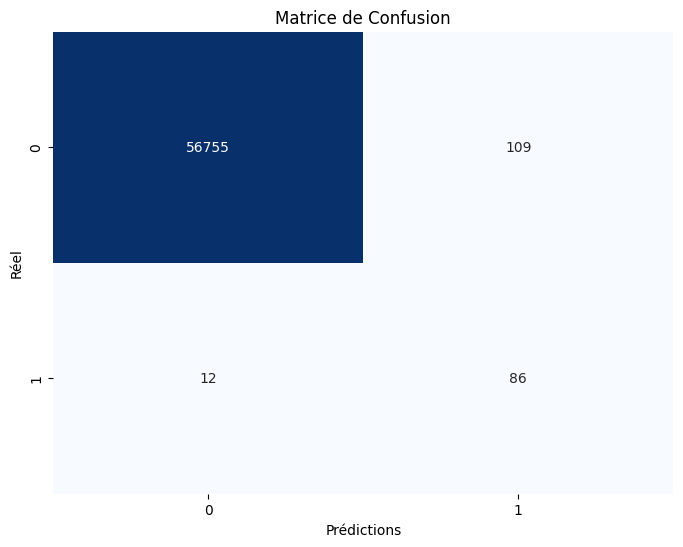

Matrice de confusion pour Lr


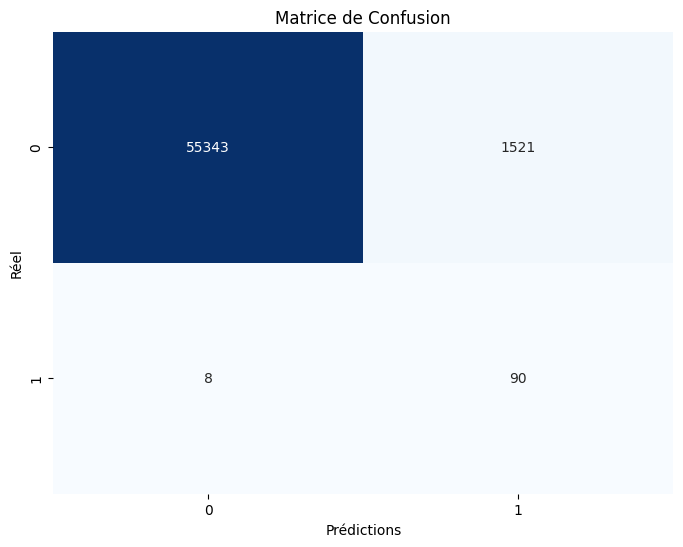

Courbe Roc pour Knn


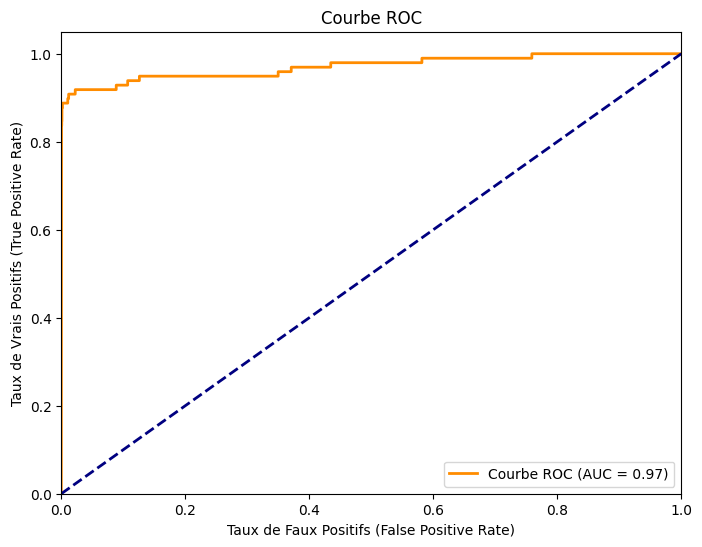

Courbe Roc pour Lr


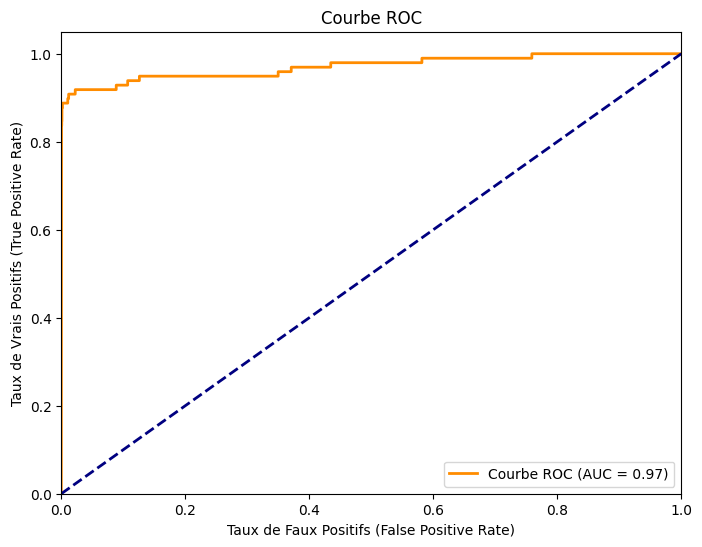

In [ ]:
over_sampling_score = KnnAndLr(X_train_smote, y_train_smote, X_test, y_test)

KNN - Accuracy : 0.9723675432744637, F1 Score : 0.10057142857142858 , Macro accuracy : 0.5265439830005039
LR - Accuracy : 0.959481759769671, F1 Score : 0.07234726688102894 , Macro accuracy : 0.5187551542210406
Matrice de confusion pour Knn


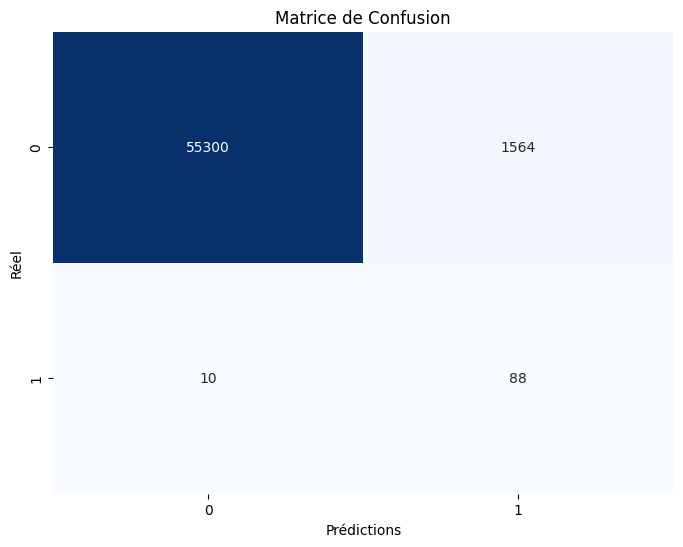

Matrice de confusion pour Lr


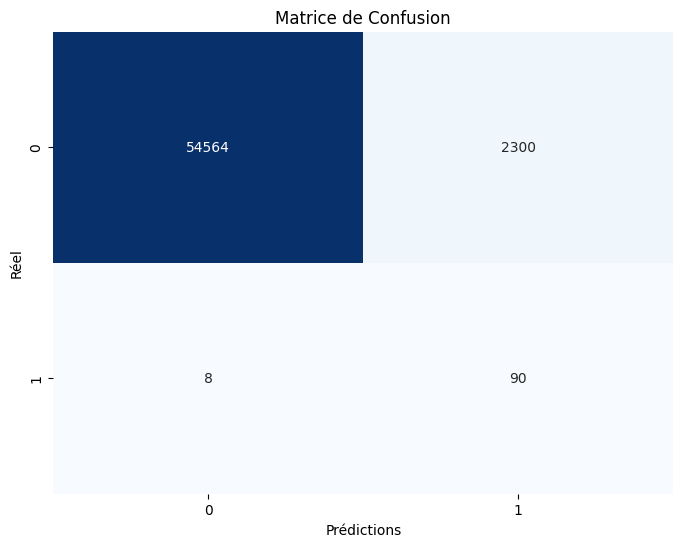

Courbe Roc pour Knn


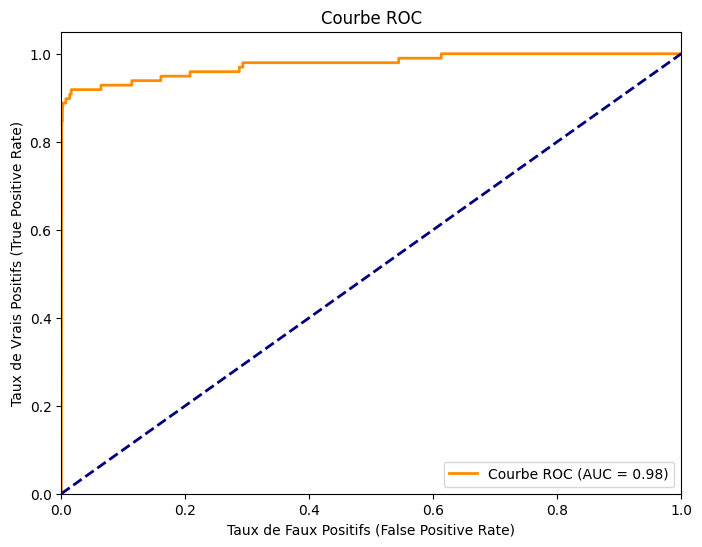

Courbe Roc pour Lr


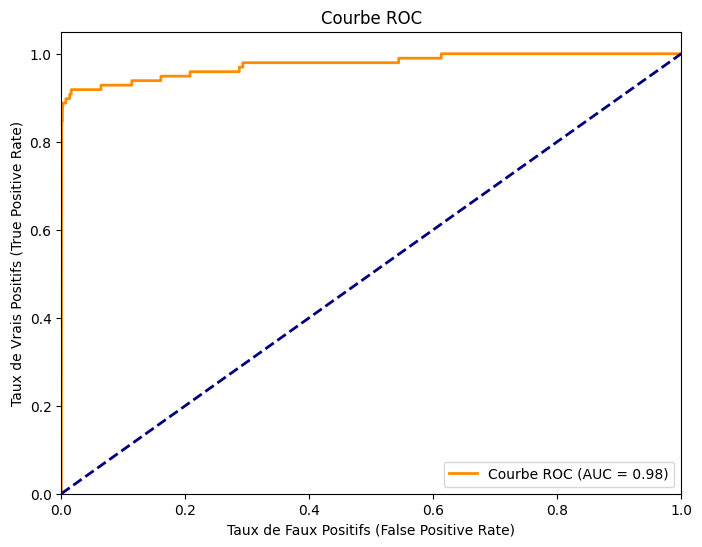

In [ ]:
under_sampling_score = KnnAndLr(X_train_rus, y_train_rus, X_test, y_test)

Matrice de Confusion des deux models

*   ### Approche qui gere le desequilibre


#### Isolation Forest:

In [ ]:
# Recherche des meilleurs parametres

# Définir les paramètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.5, 0.7, 1.0],
    'contamination': [0.001, 0.005, 0.01]
}

# Créer le modèle Isolation Forest
#iso_forest = IsolationForest()

# Configuration de GridSearchCV
#grid_search = GridSearchCV(iso_forest, param_grid, cv=5, scoring='f1')

# Ajuster le modèle
#grid_search.fit(X_train)

# Meilleurs paramètres
#print("Meilleurs paramètres : ", grid_search.best_params_)
# --- Meilleurs paramètres :  {'contamination': 0.001, 'max_samples': 0.5, 'n_estimators': 100} -->

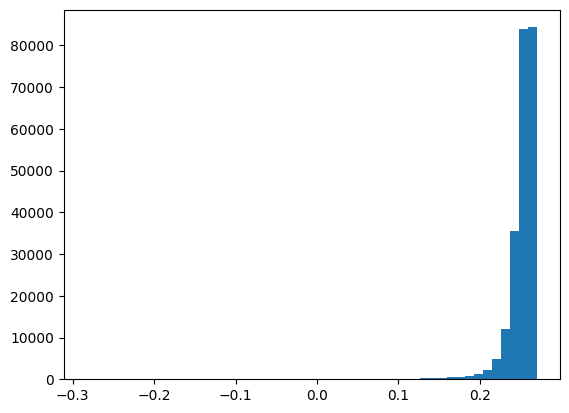

In [ ]:
# Utilisation de isolation forest

clf = IsolationForest(n_estimators=100, contamination=0.001, max_samples=0.5, random_state=42)
clf.fit(X_train)
score = clf.decision_function(X_train)
plt.hist(score, bins=50)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'isunique'

Matrice de confusion : 


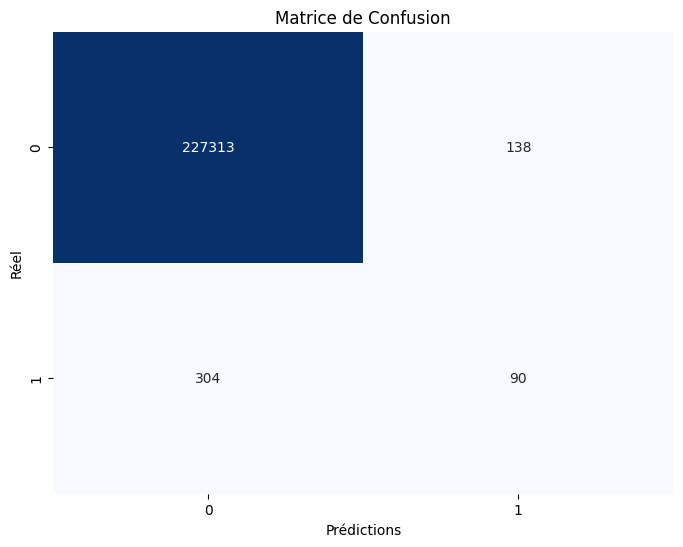

In [ ]:
# afficher la matrice de confusion

print("Matrice de confusion : ")
y_pred_clf = clf.predict(X_train)
y_pred_clf = np.where(y_pred_clf == -1, 1,0)
afficher_matrice_de_confusion(y_train, y_pred_clf)

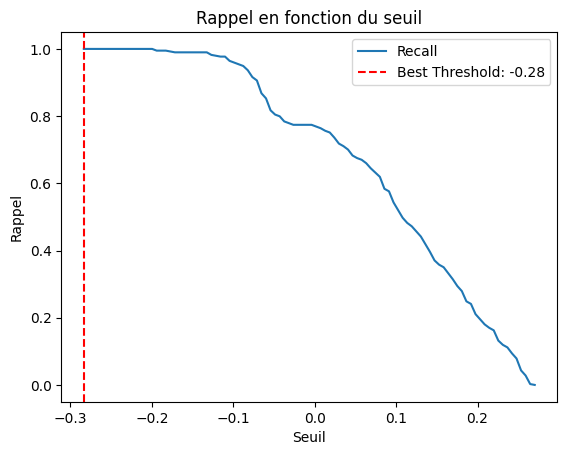

Meilleur seuil: -0.2835641406863433, Meilleur rappel: 1.0


In [ ]:
# Fonction pour trouver le seuil qui maximise le rappel
def find_best_threshold(clf, X_train, y_train):
    # 1. Obtenir les scores de décision
    scores = clf.decision_function(X_train)

    # 2. Initialiser les variables pour stocker le meilleur seuil et rappel
    best_threshold = None
    best_recall = 0

    # 3. Définir les seuils comme une plage entre le minimum et le maximum des scores
    thresholds = np.linspace(min(scores), max(scores), 100)

    # 4. Boucler sur chaque seuil et calculer le rappel
    recalls = []
    for threshold in thresholds:
        # Prédire la classe en fonction du seuil
        y_pred = (scores >= threshold).astype(int)

        # Calculer le rappel
        recall = recall_score(y_train, y_pred)
        recalls.append(recall)

        # Mettre à jour le meilleur seuil si on trouve un meilleur rappel
        if recall > best_recall:
            best_recall = recall
            best_threshold = threshold

    # 5. Afficher la courbe du rappel en fonction du seuil
    plt.plot(thresholds, recalls, label='Recall')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
    plt.xlabel('Seuil')
    plt.ylabel('Rappel')
    plt.title('Rappel en fonction du seuil')
    plt.legend()
    plt.show()

    print(f"Meilleur seuil: {best_threshold}, Meilleur rappel: {best_recall}")

    return best_threshold, best_recall

# Exemple d'utilisation
best_threshold, best_recall = find_best_threshold(clf, X_train, y_train)

#### Local Outlier Factor

In [ ]:
# Recherche des meilleurs parametres pour Local Outlier Factor

param_grid_lof = {
    'n_neighbors': [ 10, 20],
    'contamination': [0.001, 0.01]
}

# Créer le modèle Local Outlier Factor
#lof = LocalOutlierFactor()

# Configuration de GridSearchCV
#grid_search_lof = GridSearchCV(lof, param_grid_lof, cv=5, scoring='f1')

# Ajuster le modèle
# Note : LOF n'a pas de méthode `fit` comme d'autres modèles, donc tu dois travailler avec un échantillon.
#grid_search_lof.fit(X_train)

# Meilleurs paramètres
#print("Meilleurs paramètres : ", grid_search_lof.best_params_)

# Meilleurs paramètres :  {'contamination': 0.001, 'n_neighbors': 10}

In [ ]:
# Utilisation du Local Outlier Factor

lof = LocalOutlierFactor(contamination=0.001, n_neighbors= 10)
y_pred = lof.fit_predict(X_train)

lof_scores = lof.negative_outlier_factor_

Matrice de confusion : 


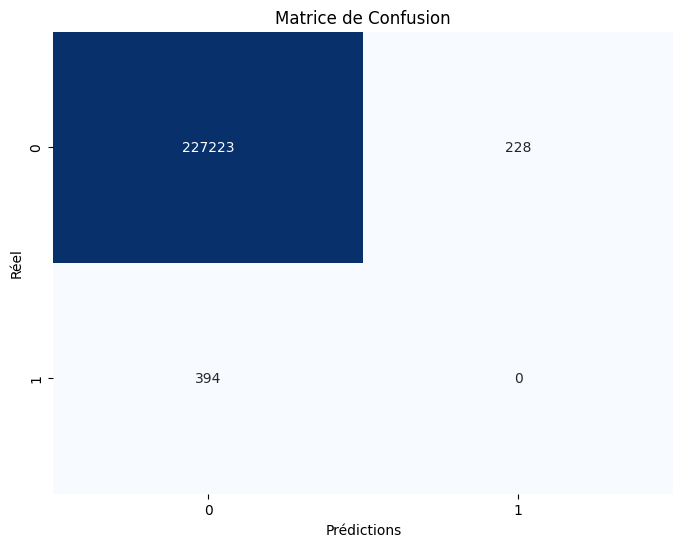

In [ ]:
y_pred_lof =  np.where(y_pred_lof == -1, 1,0)

# afficher la matrice de confusion
print("Matrice de confusion : ")
afficher_matrice_de_confusion(y_train, y_pred_lof)

In [ ]:
np.unique(y_pred_lof)
np.sum(y_pred_lof == -1)
yyy = np.where(y_pred_lof == -1, 1,0)

In [ ]:
np.sum(yyy == 1)

228

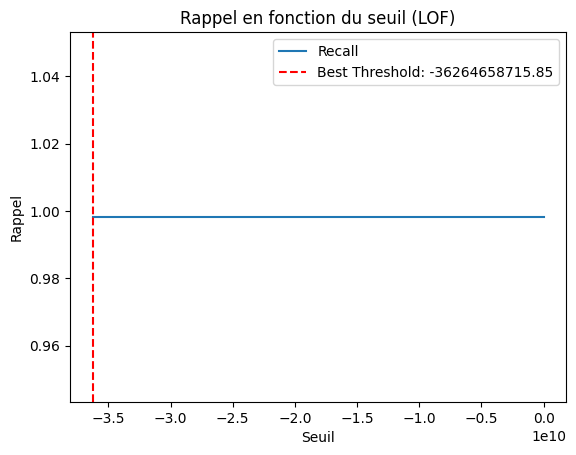

Meilleur seuil: -36264658715.853714, Meilleur rappel: 0.9982707542408216


In [ ]:
# Fonction pour trouver le meilleur seuil de LOF qui maximise le rappel
def find_best_threshold_lof(lof_scores, y_true):
    # 1. Initialiser les variables pour stocker le meilleur seuil et rappel
    best_threshold = None
    best_recall = 0

    # 2. Définir les seuils comme une plage entre le minimum et le maximum des scores
    thresholds = np.linspace(min(lof_scores), max(lof_scores), 100)

    # 3. Boucler sur chaque seuil et calculer le rappel
    recalls = []
    for threshold in thresholds:
        # Prédire les outliers : -1 si le score est inférieur ou égal au seuil, sinon 1
        y_pred = (lof_scores <= threshold).astype(int)

        # Transformer les valeurs (-1 pour les outliers, 1 pour les inliers) en (1 pour outliers, 0 pour inliers)
        y_pred = np.where(y_pred == -1, 1, 0)

        # Calculer le rappel (en supposant que y_true contient les valeurs attendues, 1 pour inliers, -1 pour outliers)
        recall = recall_score(y_true, y_pred, average='weighted')
        recalls.append(recall)

        # Mettre à jour le meilleur seuil si on trouve un meilleur rappel
        if recall > best_recall:
            best_recall = recall
            best_threshold = threshold

    # 4. Afficher la courbe du rappel en fonction du seuil
    plt.plot(thresholds, recalls, label='Recall')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
    plt.xlabel('Seuil')
    plt.ylabel('Rappel')
    plt.title('Rappel en fonction du seuil (LOF)')
    plt.legend()
    plt.show()

    print(f"Meilleur seuil: {best_threshold}, Meilleur rappel: {best_recall}")

    return best_threshold, best_recall



# Supposons que y_train contienne les vraies étiquettes (1 pour inliers, -1 pour outliers)
best_threshold, best_recall = find_best_threshold_lof(lof_scores, y_train)

### Pipelines

## Notes :
On doit aussi stratifier
On utilise la macro accuracy ou le F1 Score (dans ce cas oui) (ca pour oui non)
si on  veut des proba on utilise l'AUC (courbe roc)
si on veut que la classe positive Average Precision Score

0/1 , classe + ou les deux si cest les 2 macro accoracy sinon f1 score
si on veut des proba AUC ou APS

KNN / LR
- us Diminiue les NON, SS augmente les Oui puis on les donnes a KNN et LR (SUR BASE TRAINING pas test)
- Balancing : sur arbres de décision

In [ ]:
pipeline_knn_over = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [ ]:
def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1]))
    print(classification_report(y_test, y_pred))

In [ ]:
# Supposons que les colonnes numériques et catégoriques soient identifiées
numerical_features = ['feature1', 'feature2']  # Remplace par tes colonnes numériques
categorical_features = ['feature3', 'feature4']  # Remplace par tes colonnes catégoriques

# 1. Transformer les colonnes (StandardScaler pour les colonnes numériques, OneHotEncoder pour les colonnes catégoriques)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 2. Déclaration des pipelines pour KNN et Logistic Regression
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),  # Traitement des données (scaling, encoding)
    ('sampler', RandomUnderSampler(random_state=42)),  # Sous-échantillonnage pour équilibrer les classes
    ('classifier', KNeighborsClassifier())
])

NameError: name 'ColumnTransformer' is not defined

In [ ]:
# 2. Utiliser le modèle LOF pour obtenir les scores de décision pour les nouvelles données
lof_scores_new = lof.decision_function(X_new)

# 3. Prédire si les nouvelles données sont des outliers ou des inliers en fonction du seuil trouvé
y_pred_new = (lof_scores_new <= best_threshold).astype(int)

# Transformer les valeurs (1 pour inliers, -1 pour outliers)
y_pred_new = np.where(y_pred_new == 1, -1, 1)

# Afficher les résultats
print(f"Prédictions pour les nouvelles données : {y_pred_new}")

AttributeError: This 'LocalOutlierFactor' has no attribute 'decision_function'